In [1]:
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib
import time

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from scipy.interpolate import interpn

#from mpl_toolkits.basemap import Basemap
import math
import warnings
%matplotlib inline
import xarray as xr
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', message='All-NaN slice encountered')

from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
ds = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_31/output_WAOM_check/ocean_flt.nc')
dg = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc')

In [3]:
# ds

In [4]:
ds1 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_31/output_WAOM_check/ocean_avg_0003.nc')
ds4 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_31/output_WAOM_check/ocean_avg_0004.nc')
ds5 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_31/output_WAOM_check/ocean_avg_0005.nc')
ds6 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_31/output_WAOM_check/ocean_avg_0006.nc')
ds7 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_31/output_WAOM_check/ocean_avg_0007.nc')
ds8 = xr.open_dataset('/scratch/project_2000789/muramarg/run_5_31/output_WAOM_check/ocean_avg_0008.nc')

# add the coordinates
ds1 = ds1.chunk({'ocean_time': 1})
ds1.coords["lon_rho"] = dg.lon_rho
ds1.coords["lat_rho"] = dg.lat_rho

# plotting as grid coordinates
x = (ds.variables['Xgrid'].values)
y = (ds.variables['Ygrid'].values)

In [5]:
# load the latitude and longitude points from a text file
f = open('lonpoints531.txt', 'r')
j = open('latpoints531.txt','r')
lineslong = np.genfromtxt("lonpoints531.txt", delimiter=",", dtype=np.float32, filling_values=None)
lineslat = np.genfromtxt("latpoints531.txt", delimiter=",", dtype=np.float32, filling_values=None)
# lines = np.array(lines)
#print(lines.shape)
f.close()
j.close()
print(lineslat.shape)

(17760, 3676)


In [6]:
# # split the arrays into months
# monthslong = np.split(lineslong,6)
# monthslat = np.split(lineslat,6)

500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695


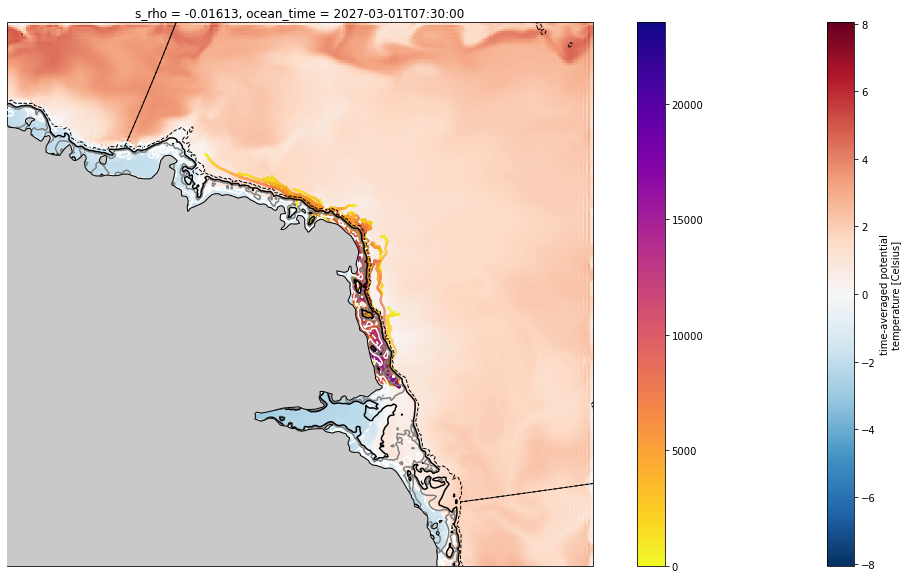

In [137]:
# visualizing all the points
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(zorder=7,facecolor='white',edgecolor='black')
#plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.temp.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())


xlimit = np.arange(300,560,1)
ylimit = np.arange(350,630,1)

#myds = ds1.temp[xlimit,ylimit]
ds1.temp.isel(s_rho=-1, ocean_time=0,xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[-0.2],zorder=5,linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.h[xlimit,ylimit],levels=[200,400,600],zorder=5, linestyles='solid', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)
#plt.scatter(lineslong,lineslat,marker = '.', linewidths=0.02,color='g',alpha=0.1,transform=ccrs.PlateCarree())

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
norm = plt.Normalize(0,len(x))
for i in range(500,700):
    if i%5==0:
        print(i)
    firstlong = np.array([(row[i]) for s,row in enumerate(lineslong) if not math.isnan(row[i])])
    firstlat = np.array([(row[i]) for s,row in enumerate(lineslat) if not math.isnan(row[i])])
    myrange = np.arange(0,len(firstlong),1,dtype=int)
     # create the segments of [lat,long]
    points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='plasma', norm=norm)
    lc.set(transform=ccrs.PlateCarree())
    lc.set_array(myrange)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
fig.colorbar(line, ax=ax)


plt.savefig("point_contours.png")
plt.show()

In [ ]:
# fig = plt.figure(figsize=(17,12))
# fig = ds1.salt.isel(s_rho=-1, ocean_time=1).plot()

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
# plt.plot(x,y,marker = '.',markersize=0.1, color='r',alpha=0.7)

In [16]:
# trying to separate points plotted at each week
# get the grids x - y is the same

# find the indexes where particles were added, new particles should be added every 672 rows
def create_arr(weeks, x,nreleases,dt):
    """
    inputs:
        weeks: weeks since first release
        x: the x grid
        nreleases: the number of times when points were released
        dt: the time between which points were released
    returns:
        arr: array of indexes for any given month
    """
    arr = np.array([])    # array for each of the four weeks in a month
    maxnum = len(x[0])
    # for each month, make a new array
    for i in range(0,4):
        thisweek = np.array([])
        # add the first value to the array
        j = weeks+i
        # loop through, adding nreleases until we reach the end of the list
        while (j<len(x[0])):
            arr = np.append(arr,(j))
            j += nreleases
    return arr
            
march = create_arr(0,x,35,7)
april = create_arr(4,x,35,7)
may = create_arr(8,x,35,7)
june = create_arr(12,x,35,7)
july = create_arr(16,x,35,7)
august = create_arr(20,x,35,7)
print(august)

[  20.   55.   90.  125.  160.  195.  230.  265.  300.  335.  370.  405.
  440.  475.  510.  545.  580.  615.  650.  685.  720.  755.  790.  825.
  860.  895.  930.  965. 1000. 1035. 1070. 1105. 1140. 1175. 1210. 1245.
 1280. 1315. 1350. 1385. 1420. 1455. 1490. 1525. 1560. 1595. 1630. 1665.
 1700. 1735. 1770. 1805. 1840. 1875. 1910. 1945. 1980. 2015. 2050. 2085.
 2120. 2155. 2190. 2225. 2260. 2295. 2330. 2365. 2400. 2435. 2470. 2505.
 2540. 2575. 2610. 2645. 2680. 2715. 2750. 2785. 2820. 2855. 2890. 2925.
 2960. 2995. 3030. 3065. 3100. 3135. 3170. 3205. 3240. 3275. 3310. 3345.
 3380. 3415. 3450. 3485. 3520. 3555. 3590. 3625. 3660.   21.   56.   91.
  126.  161.  196.  231.  266.  301.  336.  371.  406.  441.  476.  511.
  546.  581.  616.  651.  686.  721.  756.  791.  826.  861.  896.  931.
  966. 1001. 1036. 1071. 1106. 1141. 1176. 1211. 1246. 1281. 1316. 1351.
 1386. 1421. 1456. 1491. 1526. 1561. 1596. 1631. 1666. 1701. 1736. 1771.
 1806. 1841. 1876. 1911. 1946. 1981. 2016. 2051. 20

In [11]:
a = x[5761]
print(a)
b = lineslong[119]
print(b)
print(x.shape,lineslong.shape)

a3 = np.isnan(a)
print(len(a3))
# a2 = np.isnan(b)
# a3 = ~ a3
# a2 = ~ a2

#idxs = [i for i, x in enumerate(a) if x]
#print(len(idxs))
# #print(len(idxs))
# idxs2 = [i for i, x in enumerate(a2) if x]
# #print(len(idxs2))

# final_idxs = [x for x in idxs if x not in idxs2]
#print(idxs2)
#print(final_idxs)

[545.  nan  nan ...  nan  nan  nan]
[80.50608      nan      nan ...      nan      nan      nan]
(23521, 3675) (17760, 3676)
3675


In [22]:
print(len(lineslong))

17760


0 / 420 completed in 0.0296707550684611 min
50 / 420 completed in 5.0710190534591675 min
100 / 420 completed in 9.956770924727122 min
150 / 420 completed in 14.659715878963471 min
200 / 420 completed in 19.38602526585261 min
250 / 420 completed in 23.95460427602132 min
300 / 420 completed in 28.449991778532663 min
350 / 420 completed in 32.87870392402013 min
400 / 420 completed in 37.25092271566391 min


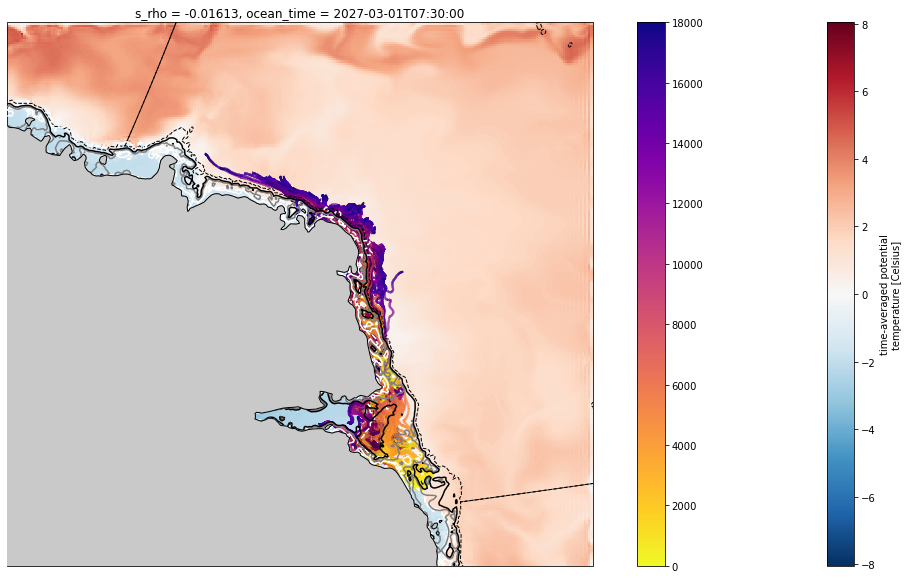

In [23]:
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(zorder=7,facecolor='white',edgecolor='black')
#plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.temp.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())
start_time = time.time()

xlimit = np.arange(300,560,1)
ylimit = np.arange(350,630,1)

#myds = ds1.temp[xlimit,ylimit]
ds1.temp.isel(s_rho=-1, ocean_time=0,xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[-0.2],zorder=5,linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.h[xlimit,ylimit],levels=[200,400,600],zorder=5, linestyles='solid', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)
#plt.scatter(lineslong,lineslat,marker = '.', linewidths=0.02,color='g',alpha=0.1,transform=ccrs.PlateCarree())

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
norm = plt.Normalize(0,18000)
num = 0
for i in (march):
    idx = (int(i))
    if num%50==0:
        print(num,'/',len(march),'completed in',(time.time()-start_time)/60,'min')
    firstlong = np.array([(row[idx]) for s,row in enumerate(lineslong) if not math.isnan(row[idx])])
    firstlat = np.array([(row[idx]) for s,row in enumerate(lineslat) if not math.isnan(row[idx])])
    myrange = np.arange(0,len(firstlong),1,dtype=int)

#     # create the segments of [lat,long]
    points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap='plasma_r', norm=norm)
    lc.set(transform=ccrs.PlateCarree())
    lc.set_array(myrange)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    
    num +=1
fig.colorbar(line, ax=ax)

plt.savefig("march_contours.png")
plt.show()

0 / 420 completed in 0.023643100261688234 min
50 / 420 completed in 4.191855112711589 min
100 / 420 completed in 8.569699430465699 min
150 / 420 completed in 12.675199580192565 min
200 / 420 completed in 17.002254883448284 min
250 / 420 completed in 20.948649473985036 min
300 / 420 completed in 24.843776369094847 min
350 / 420 completed in 28.581903330485027 min
400 / 420 completed in 32.36623674631119 min


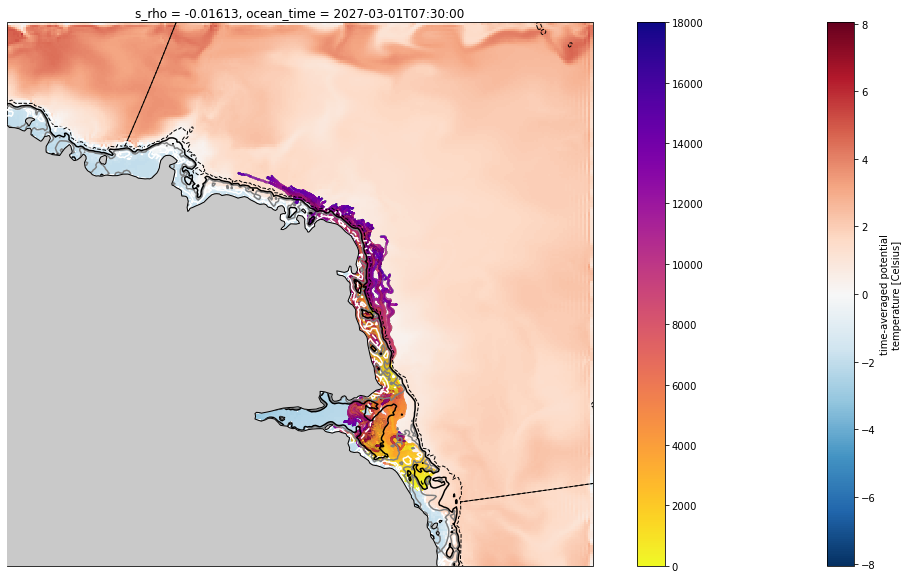

In [24]:
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(zorder=7,facecolor='white',edgecolor='black')
#plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.temp.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())
start_time = time.time()

xlimit = np.arange(300,560,1)
ylimit = np.arange(350,630,1)

#myds = ds1.temp[xlimit,ylimit]
ds1.temp.isel(s_rho=-1, ocean_time=0,xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[-0.2],zorder=5,linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.h[xlimit,ylimit],levels=[200,400,600],zorder=5, linestyles='solid', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)
#plt.scatter(lineslong,lineslat,marker = '.', linewidths=0.02,color='g',alpha=0.1,transform=ccrs.PlateCarree())

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
norm = plt.Normalize(0,18000)
num = 0
for i in (april):
    idx = (int(i))
    if num%50==0:
        print(num,'/',len(april),'completed in',(time.time()-start_time)/60,'min')
    firstlong = np.array([(row[idx]) for s,row in enumerate(lineslong) if not math.isnan(row[idx])])
    firstlat = np.array([(row[idx]) for s,row in enumerate(lineslat) if not math.isnan(row[idx])])
    myrange = np.arange(0,len(firstlong),1,dtype=int)

#     # create the segments of [lat,long]
    points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap='plasma_r', norm=norm)
    lc.set(transform=ccrs.PlateCarree())
    lc.set_array(myrange)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    
    num +=1
fig.colorbar(line, ax=ax)

plt.savefig("april_contours.png")
plt.show()

0 / 420 completed in 0.05070713758468628 min
50 / 420 completed in 3.6531664093335467 min
100 / 420 completed in 7.0547769864400225 min
150 / 420 completed in 10.313609639803568 min
200 / 420 completed in 13.551371792952219 min
250 / 420 completed in 16.778297515710197 min
300 / 420 completed in 20.033165125052133 min
350 / 420 completed in 23.136489872137705 min
400 / 420 completed in 26.019546739260356 min


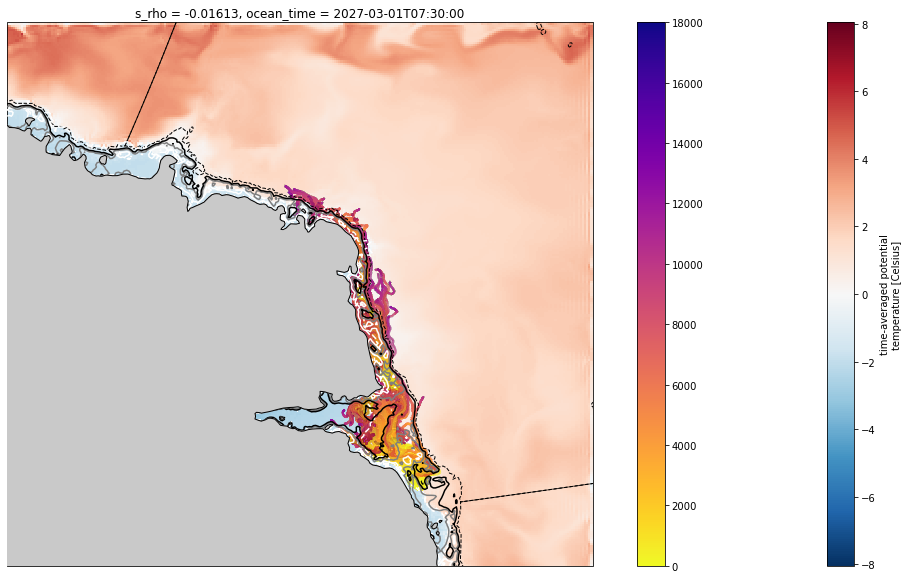

In [25]:
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(zorder=7,facecolor='white',edgecolor='black')
#plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.temp.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())
start_time = time.time()

xlimit = np.arange(300,560,1)
ylimit = np.arange(350,630,1)

#myds = ds1.temp[xlimit,ylimit]
ds1.temp.isel(s_rho=-1, ocean_time=0,xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[-0.2],zorder=5,linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.h[xlimit,ylimit],levels=[200,400,600],zorder=5, linestyles='solid', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)
#plt.scatter(lineslong,lineslat,marker = '.', linewidths=0.02,color='g',alpha=0.1,transform=ccrs.PlateCarree())

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
norm = plt.Normalize(0,18000)
num = 0
for i in (may):
    idx = (int(i))
    if num%50==0:
        print(num,'/',len(may),'completed in',(time.time()-start_time)/60,'min')
    firstlong = np.array([(row[idx]) for s,row in enumerate(lineslong) if not math.isnan(row[idx])])
    firstlat = np.array([(row[idx]) for s,row in enumerate(lineslat) if not math.isnan(row[idx])])
    myrange = np.arange(0,len(firstlong),1,dtype=int)

#     # create the segments of [lat,long]
    points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap='plasma_r', norm=norm)
    lc.set(transform=ccrs.PlateCarree())
    lc.set_array(myrange)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    
    num +=1
fig.colorbar(line, ax=ax)

plt.savefig("may_contours.png")
plt.show()

0 / 420 completed in 0.0548521359761556 min
50 / 420 completed in 2.7686028997103374 min
100 / 420 completed in 5.322773122787476 min
150 / 420 completed in 7.729968575636546 min
200 / 420 completed in 10.121569168567657 min
250 / 420 completed in 12.390168782075246 min
300 / 420 completed in 14.617234635353089 min
350 / 420 completed in 16.695890378952026 min
400 / 420 completed in 18.75571917295456 min


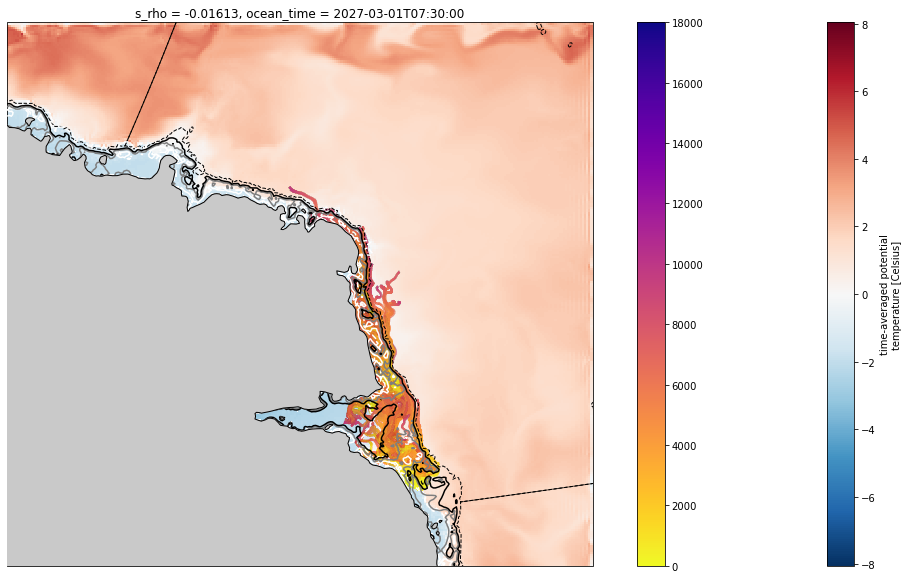

In [26]:
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(zorder=7,facecolor='white',edgecolor='black')
#plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.temp.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())
start_time = time.time()

xlimit = np.arange(300,560,1)
ylimit = np.arange(350,630,1)

#myds = ds1.temp[xlimit,ylimit]
ds1.temp.isel(s_rho=-1, ocean_time=0,xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[-0.2],zorder=5,linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.h[xlimit,ylimit],levels=[200,400,600],zorder=5, linestyles='solid', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)
#plt.scatter(lineslong,lineslat,marker = '.', linewidths=0.02,color='g',alpha=0.1,transform=ccrs.PlateCarree())

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
norm = plt.Normalize(0,18000)
num = 0
for i in (june):
    idx = (int(i))
    if num%50==0:
        print(num,'/',len(june),'completed in',(time.time()-start_time)/60,'min')
    firstlong = np.array([(row[idx]) for s,row in enumerate(lineslong) if not math.isnan(row[idx])])
    firstlat = np.array([(row[idx]) for s,row in enumerate(lineslat) if not math.isnan(row[idx])])
    myrange = np.arange(0,len(firstlong),1,dtype=int)

#     # create the segments of [lat,long]
    points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap='plasma_r', norm=norm)
    lc.set(transform=ccrs.PlateCarree())
    lc.set_array(myrange)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    
    num +=1
fig.colorbar(line, ax=ax)

plt.savefig("june_contours.png")
plt.show()

0 / 420 completed in 0.0050793608029683435 min
50 / 420 completed in 1.851920978228251 min
100 / 420 completed in 3.795610014597575 min
150 / 420 completed in 5.487364407380422 min
200 / 420 completed in 7.172044122219086 min
250 / 420 completed in 8.719195846716563 min
300 / 420 completed in 10.214925412336985 min
350 / 420 completed in 11.609754168987275 min
400 / 420 completed in 12.928658624490103 min


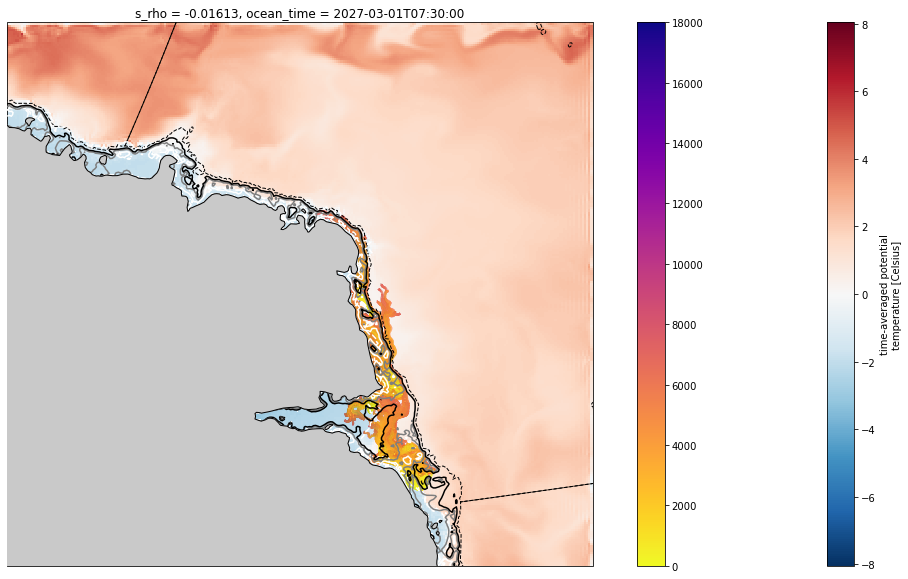

In [27]:
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(zorder=7,facecolor='white',edgecolor='black')
#plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.temp.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())
start_time = time.time()

xlimit = np.arange(300,560,1)
ylimit = np.arange(350,630,1)

#myds = ds1.temp[xlimit,ylimit]
ds1.temp.isel(s_rho=-1, ocean_time=0,xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[-0.2],zorder=5,linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.h[xlimit,ylimit],levels=[200,400,600],zorder=5, linestyles='solid', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)
#plt.scatter(lineslong,lineslat,marker = '.', linewidths=0.02,color='g',alpha=0.1,transform=ccrs.PlateCarree())

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
norm = plt.Normalize(0,18000)
num = 0
for i in (july):
    idx = (int(i))
    if num%50==0:
        print(num,'/',len(july),'completed in',(time.time()-start_time)/60,'min')
    firstlong = np.array([(row[idx]) for s,row in enumerate(lineslong) if not math.isnan(row[idx])])
    firstlat = np.array([(row[idx]) for s,row in enumerate(lineslat) if not math.isnan(row[idx])])
    myrange = np.arange(0,len(firstlong),1,dtype=int)

#     # create the segments of [lat,long]
    points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap='plasma_r', norm=norm)
    lc.set(transform=ccrs.PlateCarree())
    lc.set_array(myrange)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    
    num +=1
fig.colorbar(line, ax=ax)

plt.savefig("july_contours.png")
plt.show()

0 / 420 completed in 0.003913505872090658 min
50 / 420 completed in 1.147113807996114 min
100 / 420 completed in 2.2900303959846497 min
150 / 420 completed in 3.340387392044067 min
200 / 420 completed in 4.305965820948283 min
250 / 420 completed in 5.128667736053467 min
300 / 420 completed in 5.917484259605407 min
350 / 420 completed in 6.582414042949677 min
400 / 420 completed in 7.2085851987202965 min


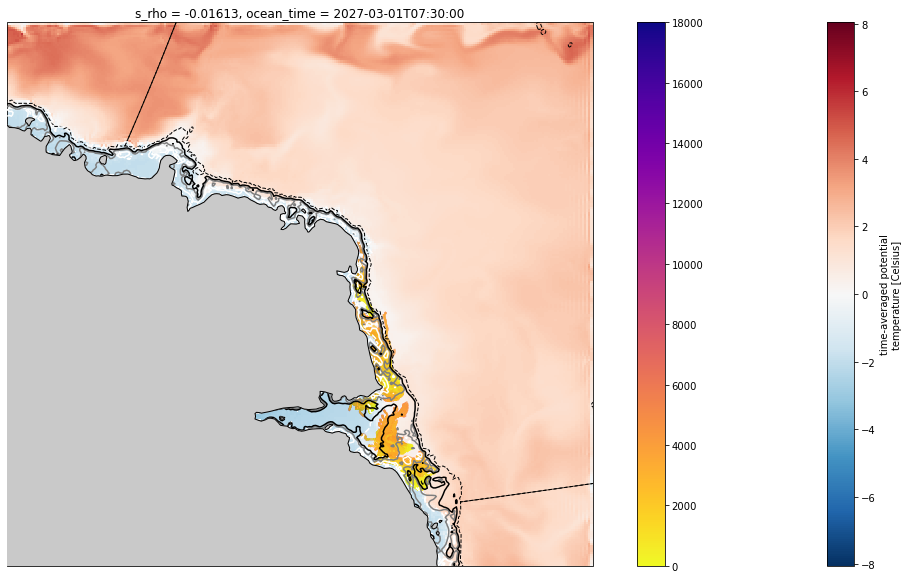

In [28]:
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines(zorder=7,facecolor='white',edgecolor='black')
#plt.pcolormesh(dg.lon_rho[300:560,200:630],dg.lat_rho[300:560,200:630],ds1.temp.isel(xi_rho=slice(200, 630),eta_rho=slice(300,560)),transform=ccrs.PlateCarree())
start_time = time.time()

xlimit = np.arange(300,560,1)
ylimit = np.arange(350,630,1)

#myds = ds1.temp[xlimit,ylimit]
ds1.temp.isel(s_rho=-1, ocean_time=0,xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[-0.2],zorder=5,linestyles='dashed', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.h[xlimit,ylimit],levels=[200,400,600],zorder=5, linestyles='solid', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='black', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)
#plt.scatter(lineslong,lineslat,marker = '.', linewidths=0.02,color='g',alpha=0.1,transform=ccrs.PlateCarree())

# x = (ds.variables['Xgrid'].values)
# y = (ds.variables['Ygrid'].values)
norm = plt.Normalize(0,18000)
num = 0
for i in (august):
    idx = (int(i))
    if num%50==0:
        print(num,'/',len(august),'completed in',(time.time()-start_time)/60,'min')
    firstlong = np.array([(row[idx]) for s,row in enumerate(lineslong) if not math.isnan(row[idx])])
    firstlat = np.array([(row[idx]) for s,row in enumerate(lineslat) if not math.isnan(row[idx])])
    myrange = np.arange(0,len(firstlong),1,dtype=int)

#     # create the segments of [lat,long]
    points = np.array([firstlong, firstlat]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap='plasma_r', norm=norm)
    lc.set(transform=ccrs.PlateCarree())
    lc.set_array(myrange)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    
    num +=1
fig.colorbar(line, ax=ax)

plt.savefig("august_contours.png")
plt.show()